In [8]:
from epyt import epanet

In [9]:
# Load EPANET Input File
G = epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.0.5).
Input File Net1.inp loaded successfully.



In [10]:
# Lists all available functions and properties
dir(G)

['BinTempfile',
 'CMDCODE',
 'ControlLevelValues',
 'ControlLinkIndex',
 'ControlNodeIndex',
 'ControlRulesCount',
 'ControlSettings',
 'ControlTypes',
 'ControlTypesIndex',
 'Controls',
 'CurveCount',
 'CurveIndex',
 'CurvesInfo',
 'DEMANDMODEL',
 'InputFile',
 'Iterations',
 'LOGOP',
 'LibEPANET',
 'LibEPANETpath',
 'LinkBulkReactionCoeff',
 'LinkCount',
 'LinkDiameter',
 'LinkFlowUnits',
 'LinkIndex',
 'LinkInitialSetting',
 'LinkInitialStatus',
 'LinkLength',
 'LinkMinorLossCoeff',
 'LinkNameID',
 'LinkPipeCount',
 'LinkPipeIndex',
 'LinkPipeNameID',
 'LinkPumpCount',
 'LinkPumpHeadCurveIndex',
 'LinkPumpIndex',
 'LinkPumpNameID',
 'LinkPumpPatternIndex',
 'LinkPumpPatternNameID',
 'LinkPumpPower',
 'LinkPumpType',
 'LinkPumpTypeCode',
 'LinkRoughnessCoeff',
 'LinkType',
 'LinkTypeIndex',
 'LinkValveCount',
 'LinkValveIndex',
 'LinkValveNameID',
 'LinkWallReactionCoeff',
 'NodeBaseDemands',
 'NodeCoordinates',
 'NodeCount',
 'NodeDemandCategoriesNumber',
 'NodeDemandPatternIndex',


In [11]:
# Retrieve some examples for the function
help(G.getNodeElevations)

Help on method getNodeElevations in module epyt.epanet:

getNodeElevations(*argv) method of epyt.epanet.epanet instance
    Retrieves the value of all node elevations.
    Example:
    
    >>> d.getNodeElevations()             # Retrieves the value of all node elevations
    >>> d.getNodeElevations(1)            # Retrieves the value of the first node elevation
    >>> d.getNodeElevations([4, 5, 6])    # Retrieves the value of the 5th to 7th node elevations
    
    See also setNodeElevations, getNodesInfo, getNodeNameID,
    getNodeType, getNodeEmitterCoeff, getNodeInitialQuality.



In [12]:
# Retrieve Link diameters
diameters = G.getLinkDiameter()
print(diameters)

[18. 14. 10. 10. 12.  6. 18. 10. 12.  8.  8.  6.  0.]


In [13]:
# Retrieve Node elevations
elevations = G.getNodeElevations()
print(elevations)

[710. 710. 700. 695. 700. 695. 690. 700. 710. 800. 850.]


In [14]:
# Link diameter for links 2 & 10
diameters = G.getLinkDiameter([2, 10])
print(diameters)

[14.  8.]


In [15]:
# Update the link 10 diameter from 100 to 90
G.setLinkDiameter(10, 90)
# Retrieve the diameter of link 10
n_diameter = G.getLinkDiameter(10)
print(n_diameter)

90.0


In [16]:
# Solve hydraulics in library
# H = G.getComputedHydraulicTimeSeries()
# Solve quality dynamics in library
# Q = G.getComputedQualityTimeSeries()
# Solve all dynamics in library, create a binary file to store the computed values
R = G.getComputedTimeSeries()

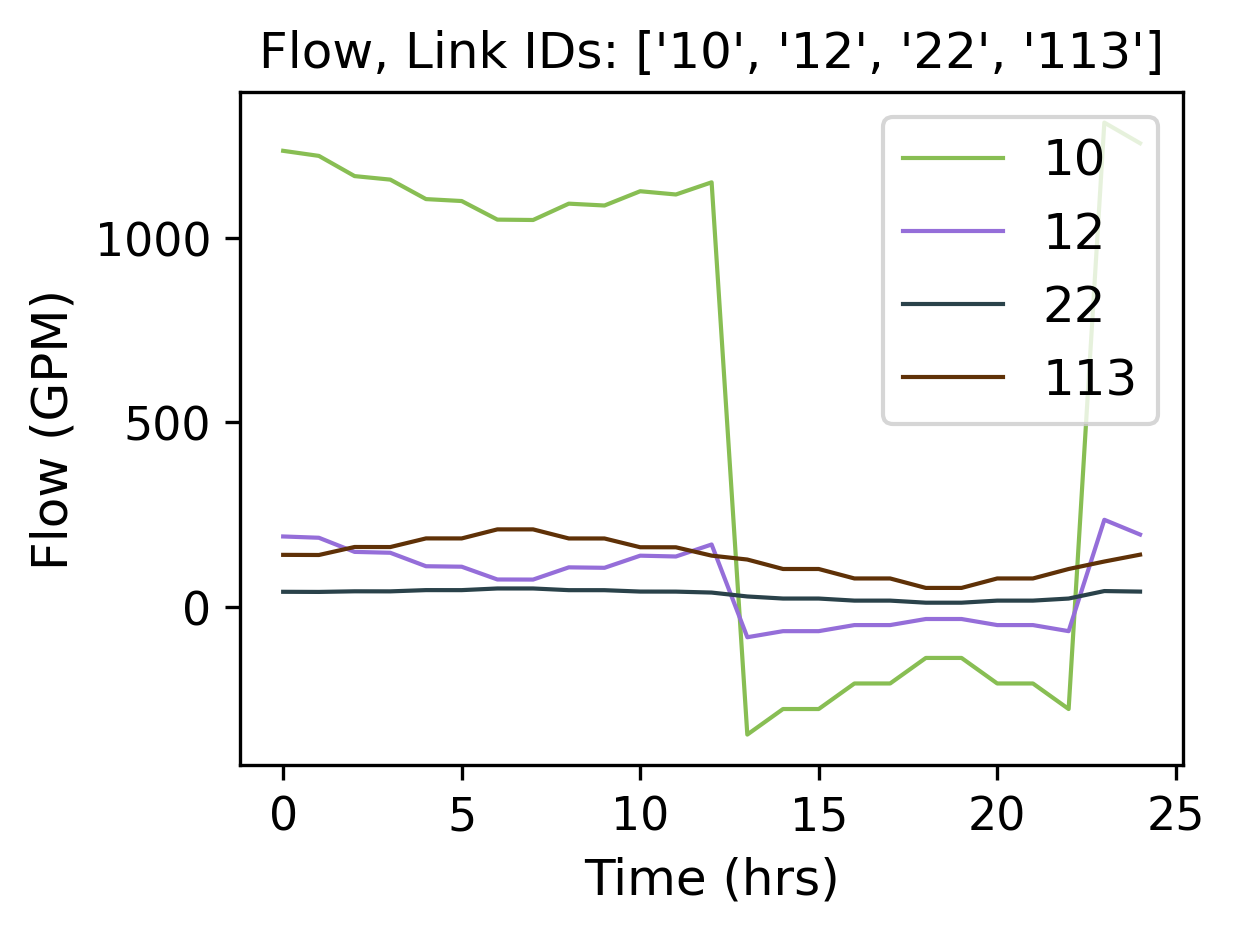

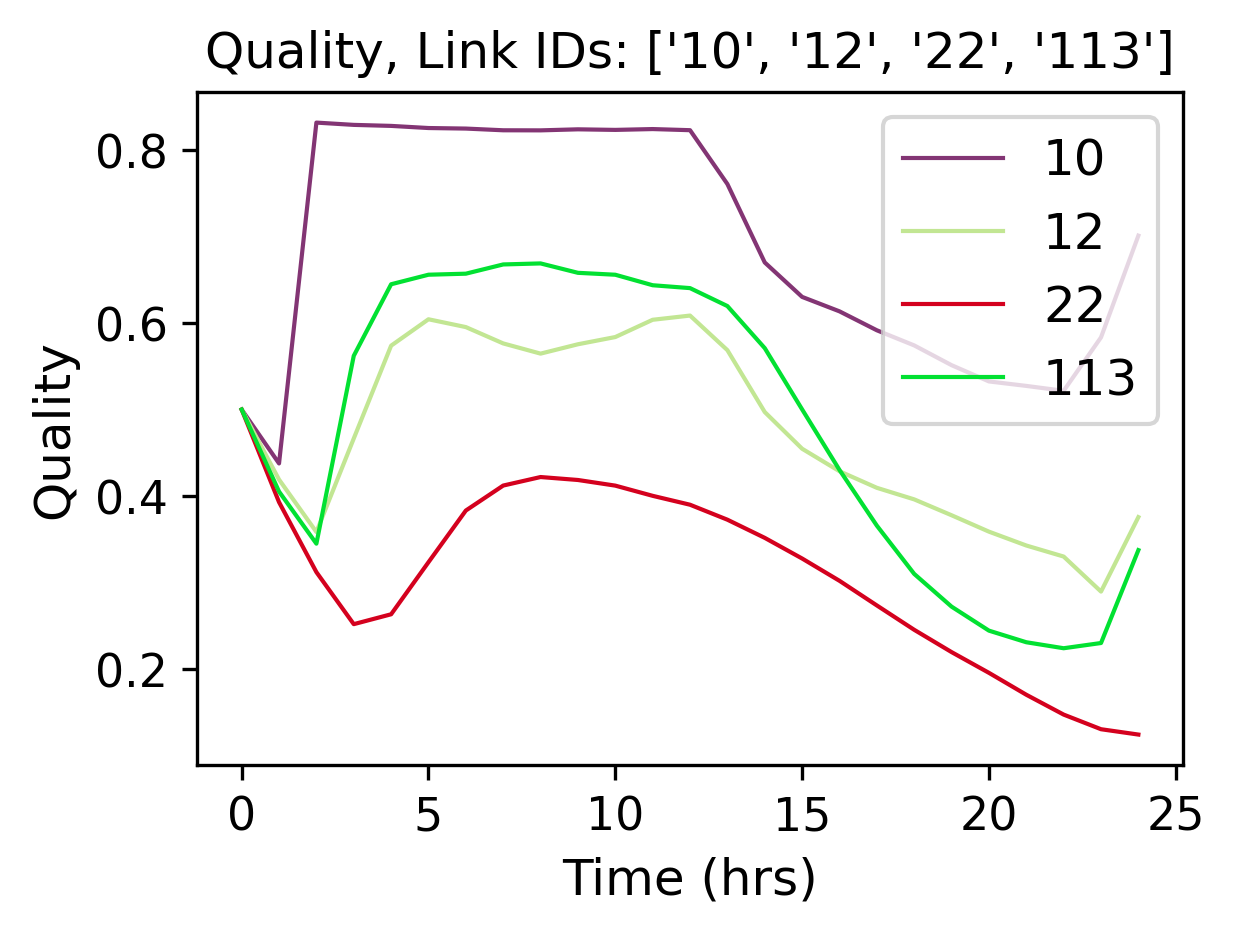

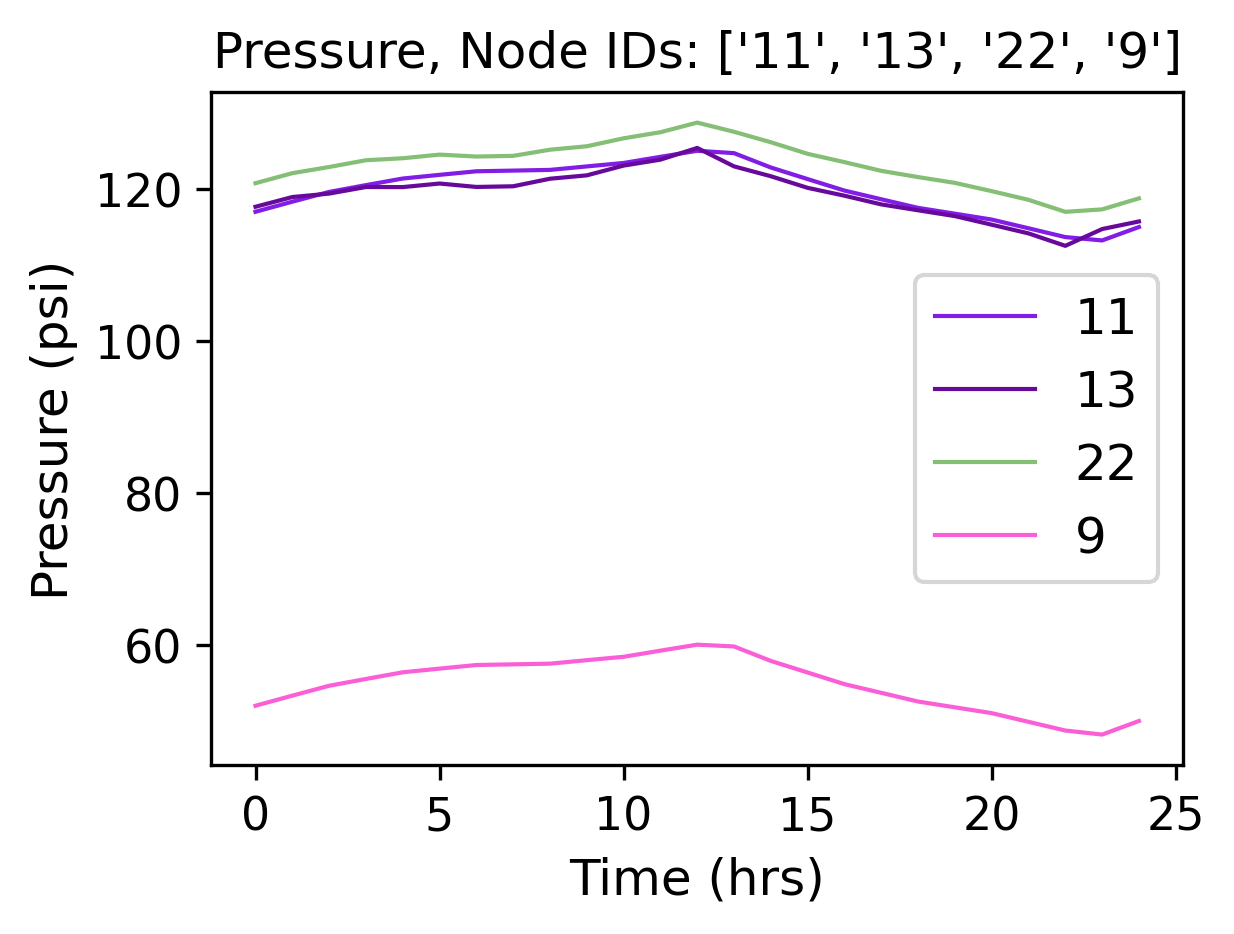

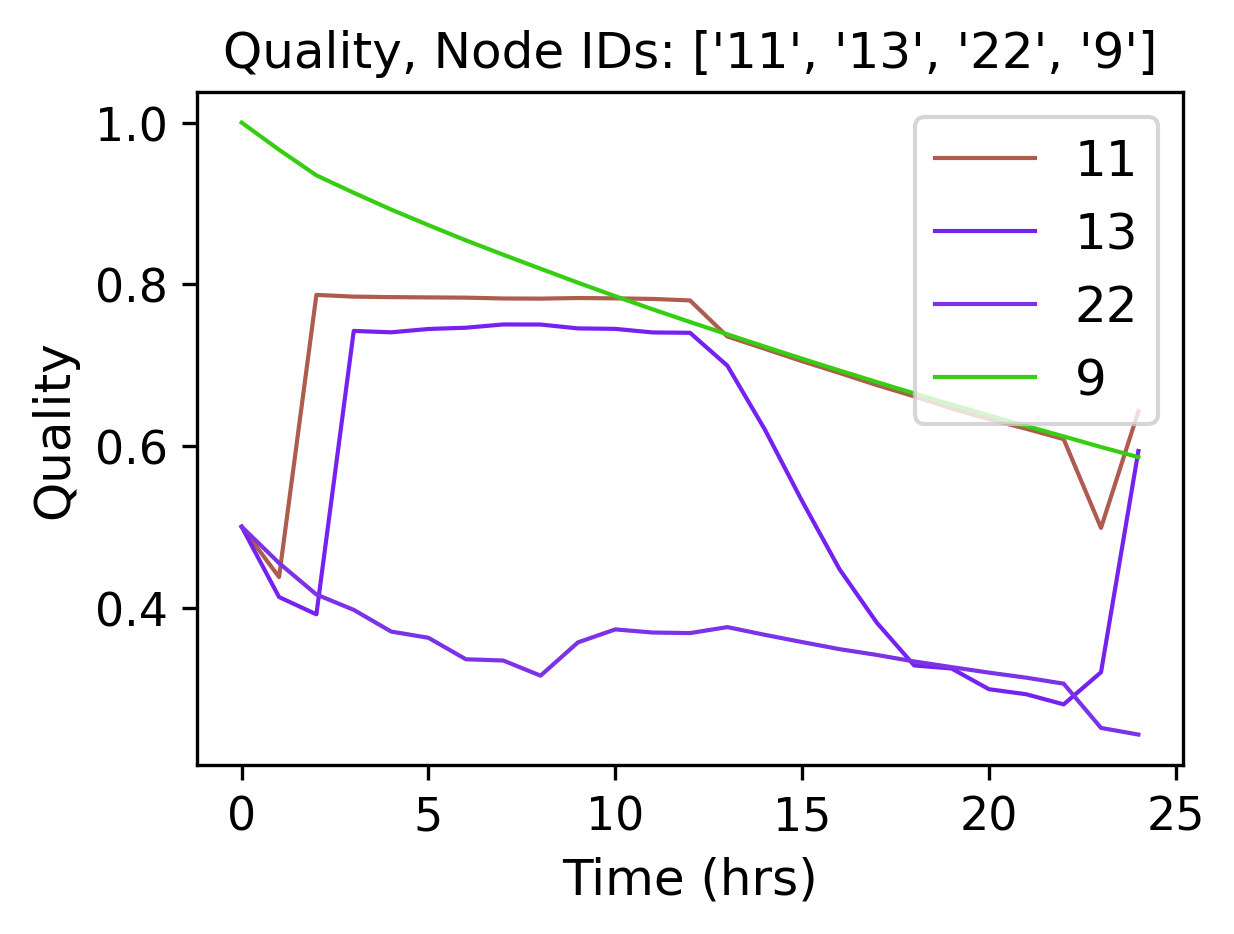

In [17]:
# Plot link flows and quality
hrs_time = R.Time / 3600
link_indices = [1, 3, 5, 10]
link_names = G.getLinkNameID(link_indices)
G.plot_ts(X=hrs_time, Y=R.Flow[:, link_indices],
          title=f'Flow, Link IDs: {link_names}', figure_size=[4, 3], legend_location='best',
          xlabel='Time (hrs)', ylabel=f'Flow ({G.units.LinkFlowUnits})',
          marker=None, labels=link_names, save_fig=True, filename='figures/paper_flows')
G.plot_ts(X=hrs_time, Y=R.LinkQuality[:, link_indices],
          title=f'Quality, Link IDs: {link_names}', legend_location='best',
          xlabel='Time (hrs)', ylabel=f'Quality', figure_size=[4, 3],
          marker=None, labels=link_names, save_fig=True, filename='figures/paper_link_quality')

# Plot node pressures and quality
node_indices = [2, 4, 6, 10]
node_names = G.getNodeNameID(node_indices)
G.plot_ts(X=hrs_time, Y=R.Pressure[:, node_indices], legend_location='best',
          title=f'Pressure, Node IDs: {node_names}', figure_size=[4, 3],
          xlabel='Time (hrs)', ylabel=f'Pressure ({G.units.NodePressureUnits})',
          marker=None, labels=node_names, save_fig=True, filename='figures/paper_pressures')

G.plot_ts(X=hrs_time, Y=R.NodeQuality[:, node_indices],
          title=f'Quality, Node IDs: {node_names}', legend_location='best',
          xlabel='Time (hrs)', ylabel=f'Quality', figure_size=[4, 3],
          marker=None, labels=node_names, save_fig=True, filename='figures/paper_node_quality')
